## Observations and Insights 

In [103]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how = 'inner')
# Display the data table for preview

combined_df.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].value_counts()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Size of orginal DF= 1892, Size of new DF 1888

#duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

duplicated_mice = combined_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicated_mice 



0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_study_df.reset_index(inplace=True)
print(len(mouse_study_df))


mouse_study_df.head(15)


1888


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
5,5,k403,Ramicane,Male,21,16,25,33.464577,1
6,6,k403,Ramicane,Male,21,16,30,31.099498,1
7,7,k403,Ramicane,Male,21,16,35,26.546993,1
8,8,k403,Ramicane,Male,21,16,40,24.365505,1
9,9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_study_df)
num_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
regimens = mouse_study_df['Drug Regimen'].unique()
print(regimens)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = mouse_study_df.groupby(["Drug Regimen"])

drug_mean = drug_regimen['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen['Tumor Volume (mm3)'].median()
drug_var = drug_regimen['Tumor Volume (mm3)'].var()
drug_std = drug_regimen['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen['Tumor Volume (mm3)'].sem()

data = {
    'Mean': drug_mean,
    'Median':drug_median,
    'Variance' : drug_var,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
}

summary_df = pd.DataFrame(data)
summary_df

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = drug_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
summary_aggregate



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

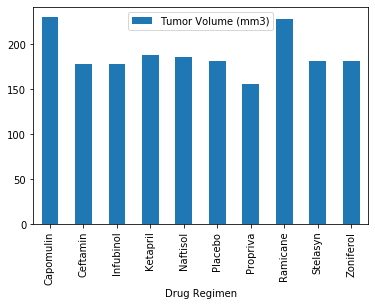

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_drug_test =drug_regimen['Tumor Volume (mm3)'].count()
data_bar:{
    'Drug Regimen': regimens,
    'Number of Measurments': num_drug_test
}
bar_pd_df = pd.DataFrame(num_drug_test)
bar_pd_df.plot.bar()
#print(drug_regimen)
#pd.DataFrame(drug_regimen.count())
#ax =  mouse_study_df.plot.bar(x='Drug Regimen',y = 'Tumor Volume (mm3)', rot=90)

Text(0, 0.5, 'Number of Measurments')

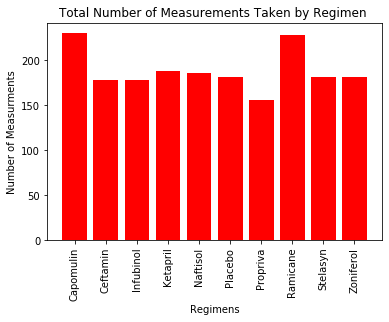

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#The tick are wrong
num_regimen = drug_regimen['Mouse ID'].count()

plt.bar(bar_pd_df.index, num_regimen ,color ='r')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Total Number of Measurements Taken by Regimen ')
plt.xlabel('Regimens')
plt.ylabel('Number of Measurments')




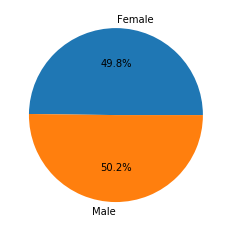

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = mouse_study_df.loc[:,['Mouse ID','Sex']] #1888

#DataFrame with Uniques ID and Sex Column
unique_sex_id = sex_df.drop_duplicates(subset='Mouse ID')

#DataFrame Number ofsex
num_sex = unique_sex_id.groupby('Sex').count()
labels = num_sex.index


plot_pandas = plt.pie(num_sex['Mouse ID'],labels = labels,autopct="%1.1f%%")


[124 125]


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


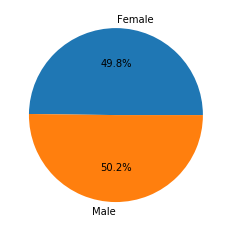

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
array_sex = np.array(num_sex['Mouse ID'])

plot_py = plt.pie(array_sex,labels = labels,autopct="%1.1f%%")

print(array_sex)
mouse_study_df.head()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#original DataFrame mouse_study_df len = 1888


# Start by getting the last (greatest) timepoint for each mouse

mouse_timepoint = mouse_study_df[['index','Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

mouseID_timepoint = mouse_timepoint.groupby('Mouse ID')

max_timepoint = mouseID_timepoint['Timepoint'].max()

min_volume = mouseID_timepoint['Tumor Volume (mm3)'].min()




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#DataFrame with Biggest Timepoint and and Lowest Tumor Volume (mm3) for each Mice
timepoint_tumor = pd.merge(mouse_timepoint,max_timepoint,on = ['Mouse ID','Timepoint'])


timepoint_tumor

,index,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,9,k403,Ramicane,45,22.050126
1,19,s185,Capomulin,45,23.343598
2,29,x401,Capomulin,45,28.484033
3,39,m601,Capomulin,45,28.430964
4,49,g791,Ramicane,45,29.128472
...,...,...,...,...,...
244,1859,z314,Stelasyn,5,45.934712
245,1862,z435,Propriva,10,48.710661
246,1872,z581,Infubinol,45,62.754451
247,1882,z795,Naftisol,45,65.741070


In [110]:
mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'z795',:]

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1868,1873,z795,Naftisol,Female,13,29,0,45.000000,0
1869,1874,z795,Naftisol,Female,13,29,5,46.833475,0
1870,1875,z795,Naftisol,Female,13,29,10,48.030804,0
1871,1876,z795,Naftisol,Female,13,29,15,49.368132,1
1872,1877,z795,Naftisol,Female,13,29,20,53.280657,1
1873,1878,z795,Naftisol,Female,13,29,25,57.947100,2
1874,1879,z795,Naftisol,Female,13,29,30,59.789636,2
1875,1880,z795,Naftisol,Female,13,29,35,60.435654,2
1876,1881,z795,Naftisol,Female,13,29,40,62.376639,3
1877,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [201]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_vol_dat = []
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_dat = []
for treatment in list_treatment:
    tumor =timepoint_tumor.loc[timepoint_tumor['Drug Regimen']==treatment,['index','Mouse ID','Tumor Volume (mm3)','Drug Regimen']]
    pd.DataFrame(tumor_vol_dat.append(tumor))

#List that each element is a DataFrame that contains Each regimen for individual Mouse and Lowest Tumor Volume
tumor_vol_dat





# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_tumor = tumor_vol_dat[0]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of Tumor Volume is: {lowerq}")
#print(f"The upper quartile of Tumor Volume is: {upperq}")
#print(f"The interquartile range of Tumor Volume is: {iqr}")
#print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume is: 46.91089166
The upper quartile of Tumor Volume is: 64.95756185
The interquartile range of Tumor Volume is: 18.046670190000007
The the median of Tumor Volume is: 55.84141007 
Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
#ax1.set_title('Tumor Volume for each Drug Regimen')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_volume)
#plt.show()


## Line and Scatter Plots

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,10,s185,Capomulin,Female,3,17,0,45.000000,0
11,11,s185,Capomulin,Female,3,17,5,43.878496,0
12,12,s185,Capomulin,Female,3,17,10,37.614948,0
13,13,s185,Capomulin,Female,3,17,15,38.177232,0
14,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
440,440,i557,Capomulin,Female,1,24,45,47.685963,1
1447,1452,r157,Capomulin,Male,22,25,0,45.000000,0
1448,1453,r157,Capomulin,Male,22,25,5,45.597064,0
1449,1454,r157,Capomulin,Male,22,25,10,46.059608,0


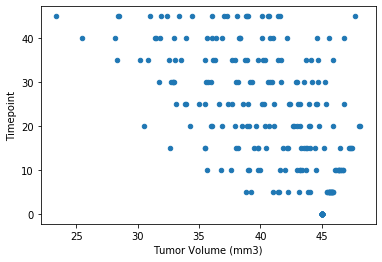

In [240]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

timePoint_v_tumorVolume = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin',:]

timePoint_v_tumorVolume.plot.scatter('Tumor Volume (mm3)','Timepoint')
plt.ylabel('Timepoint')

timePoint_v_tumorVolume

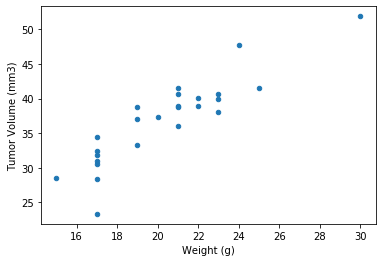

In [224]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#List of the index of Campoulin

weight_v_tumorVolume = mouse_study_df.iloc[list_index,[5,7]]
weight_v_tumorVolume.plot.scatter('Weight (g)','Tumor Volume (mm3)')


## Correlation and Regression

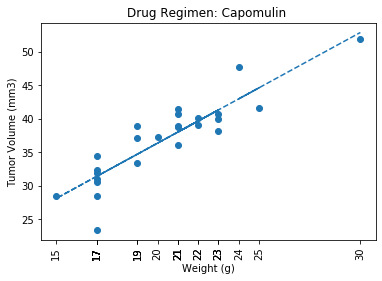

In [246]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


weight = weight_v_tumorVolume['Weight (g)']
tumor_volume = weight_v_tumorVolume['Tumor Volume (mm3)']

#slope, intercept, r, p, se = linregress(x, y)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight,tumor_volume)

vc_fit = vc_slope * weight + vc_int


plt.scatter(weight,tumor_volume)
plt.plot(weight,vc_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Regimen: Capomulin ')
plt.show()